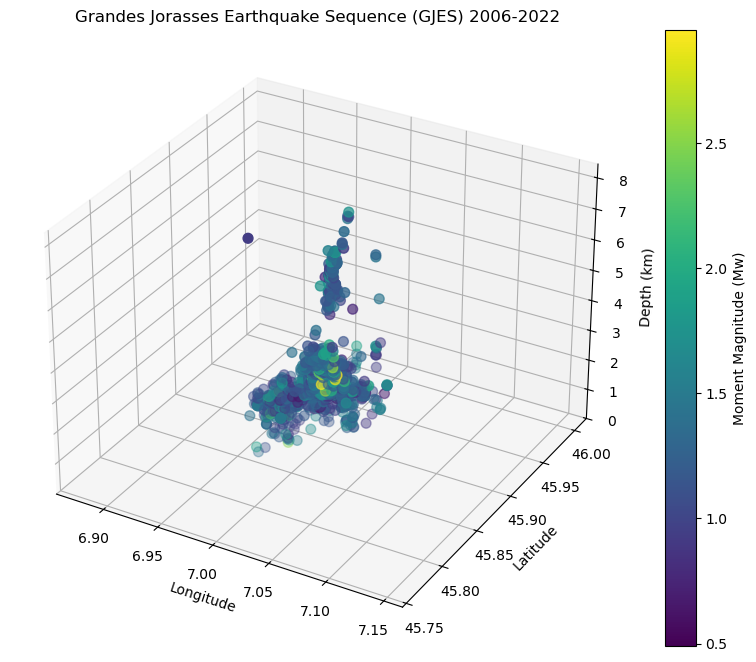

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

data = []
with open('data.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        if '│' in line and 'eventID' not in line:  # Skip header and empty lines
            parts = [part.strip() for part in line.split('│')[1:-1]]
            data.append(parts)

columns = ['eventID', 'DateTime', 'MLx', 'Mw', 'TpN', 'CCC', 'Type', 'Lon', 'Lat', 'Depth', 'ErrorX', 'ErrorY', 'ErrorZ']
df = pd.DataFrame(data, columns=columns)

df['MLx'] = pd.to_numeric(df['MLx'], errors='coerce')
df['Mw'] = pd.to_numeric(df['Mw'], errors='coerce')
df['TpN'] = pd.to_numeric(df['TpN'], errors='coerce')
df['CCC'] = pd.to_numeric(df['CCC'], errors='coerce')
df['Lon'] = pd.to_numeric(df['Lon'], errors='coerce')
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Depth'] = pd.to_numeric(df['Depth'], errors='coerce')
df['ErrorX'] = pd.to_numeric(df['ErrorX'], errors='coerce')
df['ErrorY'] = pd.to_numeric(df['ErrorY'], errors='coerce')
df['ErrorZ'] = pd.to_numeric(df['ErrorZ'], errors='coerce')

df_filtered = df.dropna(subset=['Lon', 'Lat', 'Depth'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_filtered['Lon'], df_filtered['Lat'], df_filtered['Depth'], 
                    c=df_filtered['Mw'], cmap='viridis', s=50)

plt.colorbar(scatter, label='Moment Magnitude (Mw)')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (km)')
ax.set_title('Grandes Jorasses Earthquake Sequence (GJES) 2006-2022')

ax.set_xlim([min(df_filtered['Lon']) - 0.1, max(df_filtered['Lon']) + 0.1])
ax.set_ylim([min(df_filtered['Lat']) - 0.1, max(df_filtered['Lat']) + 0.1])
ax.set_zlim([0, max(df_filtered['Depth']) + 1])

plt.show()

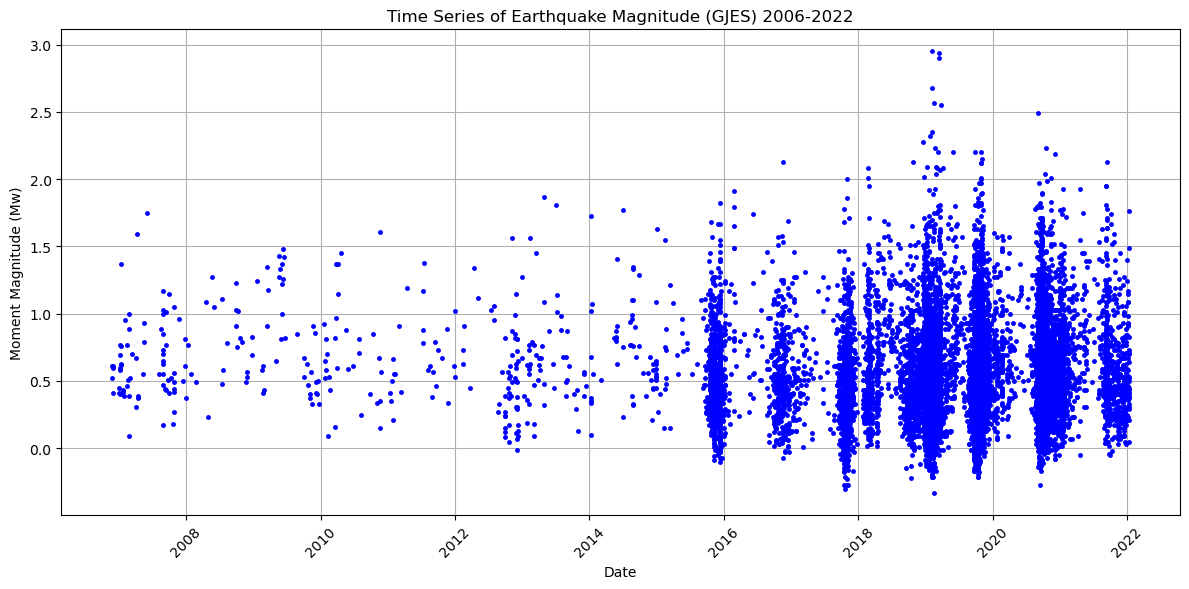

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

data = []
with open('data.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        if '│' in line and 'eventID' not in line:  
            parts = [part.strip() for part in line.split('│')[1:-1]]
            data.append(parts)

columns = ['eventID', 'DateTime', 'MLx', 'Mw', 'TpN', 'CCC', 'Type', 'Lon', 'Lat', 'Depth', 'ErrorX', 'ErrorY', 'ErrorZ']
df = pd.DataFrame(data, columns=columns)

df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

df['Mw'] = pd.to_numeric(df['Mw'], errors='coerce')

df_filtered = df.dropna(subset=['Mw'])

plt.figure(figsize=(12, 6))
plt.plot(df_filtered['DateTime'], df_filtered['Mw'], 'b.', markersize=5)

plt.xlabel('Date')
plt.ylabel('Moment Magnitude (Mw)')
plt.title('Time Series of Earthquake Magnitude (GJES) 2006-2022')
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

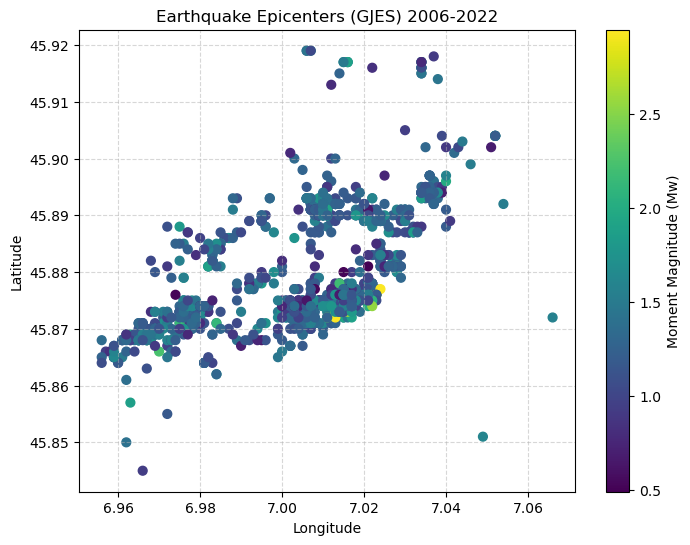

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['Lon'], df_filtered['Lat'], c=df_filtered['Mw'], cmap='viridis', s=40)
plt.colorbar(label='Moment Magnitude (Mw)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Epicenters (GJES) 2006-2022')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [17]:
! pip install cartopy

  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 24.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 25.6 MB/s eta 0:00:00
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [cartopy]m3/4 [cartopy]


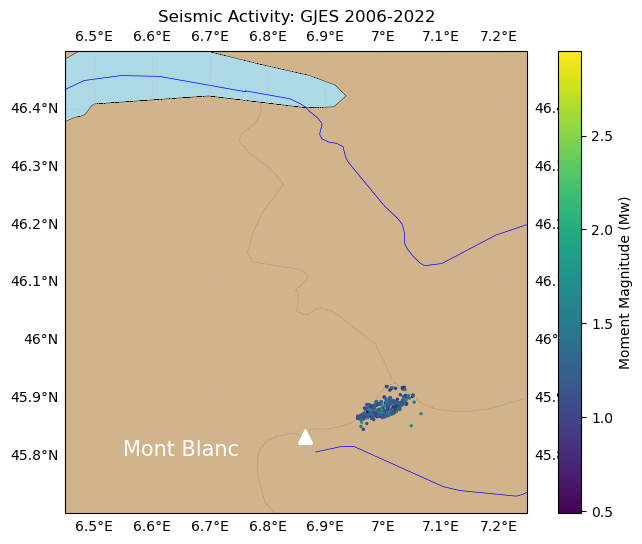

In [69]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([6.45, 7.25, 45.7, 46.5], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature(
    category='physical', name='land', scale='10m', 
    facecolor='tan', edgecolor='black', linewidth=0.5), zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1.7, zorder=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray', linewidth=0.5, zorder=1)
ax.add_feature(cfeature.NaturalEarthFeature(
    category='physical', name='lakes', scale='10m', 
    facecolor='lightblue', edgecolor='black', linewidth=0.3), zorder=1)
ax.add_feature(cfeature.NaturalEarthFeature(
    category='physical', name='rivers_lake_centerlines', scale='10m', 
    edgecolor='blue', facecolor='none', linewidth=0.5), zorder=2)

ax.gridlines(draw_labels=True, linestyle='--', alpha=.2)

scatter = ax.scatter(
    df_filtered['Lon'], 
    df_filtered['Lat'], 
    c=df_filtered['Mw'], 
    cmap='viridis', 
    s=2, 
    transform=ccrs.PlateCarree(),
    zorder=3
)

ax.plot(6.865, 45.833, marker='^', color='white', markersize=10, transform=ccrs.PlateCarree(), zorder=4)
ax.text(6.5 + 0.05, 45.8, 'Mont Blanc', transform=ccrs.PlateCarree(), fontsize=15, color='white', zorder=4)

plt.colorbar(scatter, label='Moment Magnitude (Mw)')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Seismic Activity: GJES 2006-2022')

plt.show()

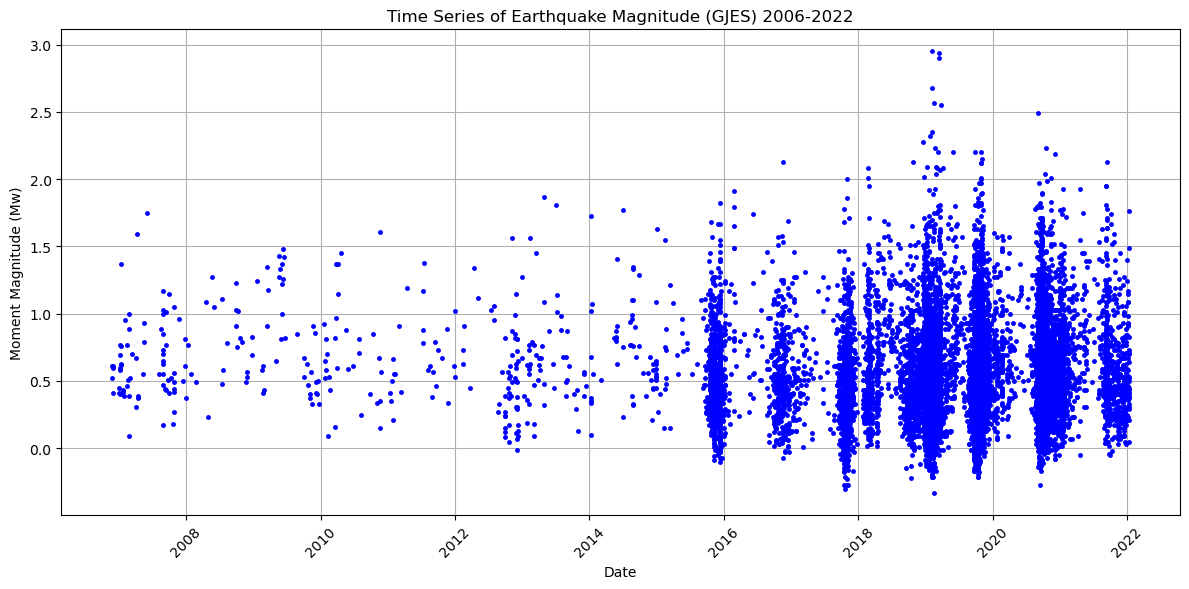

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the text file
data = []
with open('data.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        if '│' in line and 'eventID' not in line:  # Skip header and empty lines
            parts = [part.strip() for part in line.split('│')[1:-1]]
            data.append(parts)

# Create a DataFrame
columns = ['eventID', 'DateTime', 'MLx', 'Mw', 'TpN', 'CCC', 'Type', 'Lon', 'Lat', 'Depth', 'ErrorX', 'ErrorY', 'ErrorZ']
df = pd.DataFrame(data, columns=columns)

# Convert DateTime to datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# Convert Mw to numeric, handling missing values ('-')
df['Mw'] = pd.to_numeric(df['Mw'], errors='coerce')

# Filter out rows with missing Mw values
df_filtered = df.dropna(subset=['Mw'])

# Create time series plot
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['DateTime'], df_filtered['Mw'], 'b.', markersize=5)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Moment Magnitude (Mw)')
plt.title('Time Series of Earthquake Magnitude (GJES) 2006-2022')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

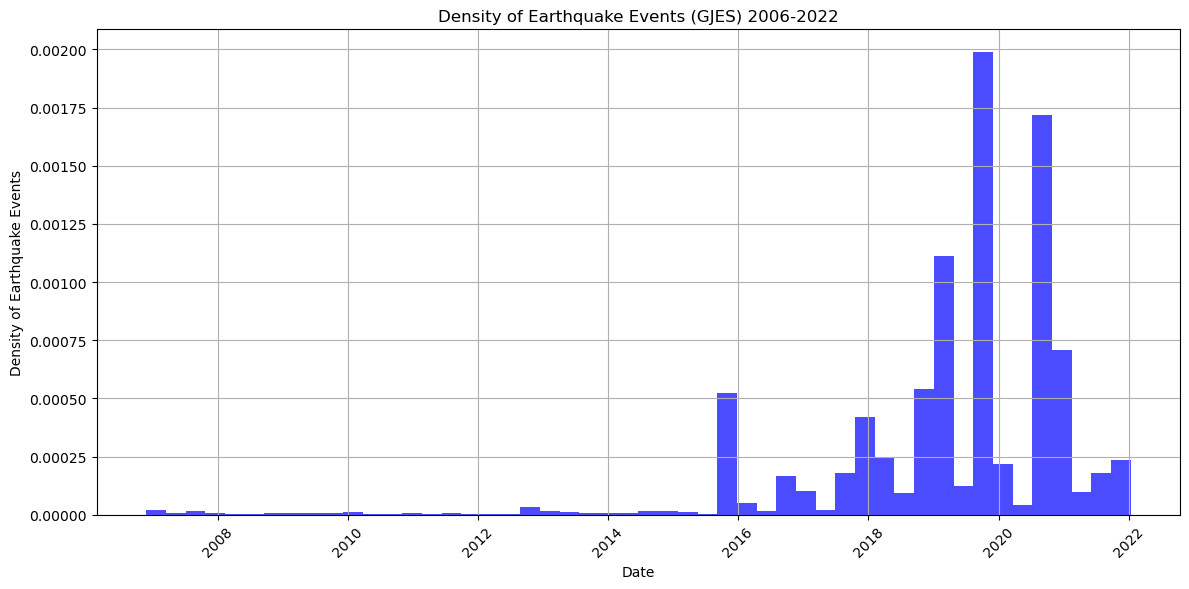

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the text file
data = []
with open('data.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        if '│' in line and 'eventID' not in line:  # Skip header and empty lines
            parts = [part.strip() for part in line.split('│')[1:-1]]
            data.append(parts)

# Create a DataFrame
columns = ['eventID', 'DateTime', 'MLx', 'Mw', 'TpN', 'CCC', 'Type', 'Lon', 'Lat', 'Depth', 'ErrorX', 'ErrorY', 'ErrorZ']
df = pd.DataFrame(data, columns=columns)

# Convert DateTime to datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# Convert Mw to numeric, handling missing values ('-')
df['Mw'] = pd.to_numeric(df['Mw'], errors='coerce')

# Filter out rows with missing Mw values
df_filtered = df.dropna(subset=['Mw'])

# Create a density plot (histogram of events over time)
plt.figure(figsize=(12, 6))
plt.hist(df_filtered['DateTime'], bins=50, color='blue', alpha=0.7, density=True)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Density of Earthquake Events')
plt.title('Density of Earthquake Events (GJES) 2006-2022')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

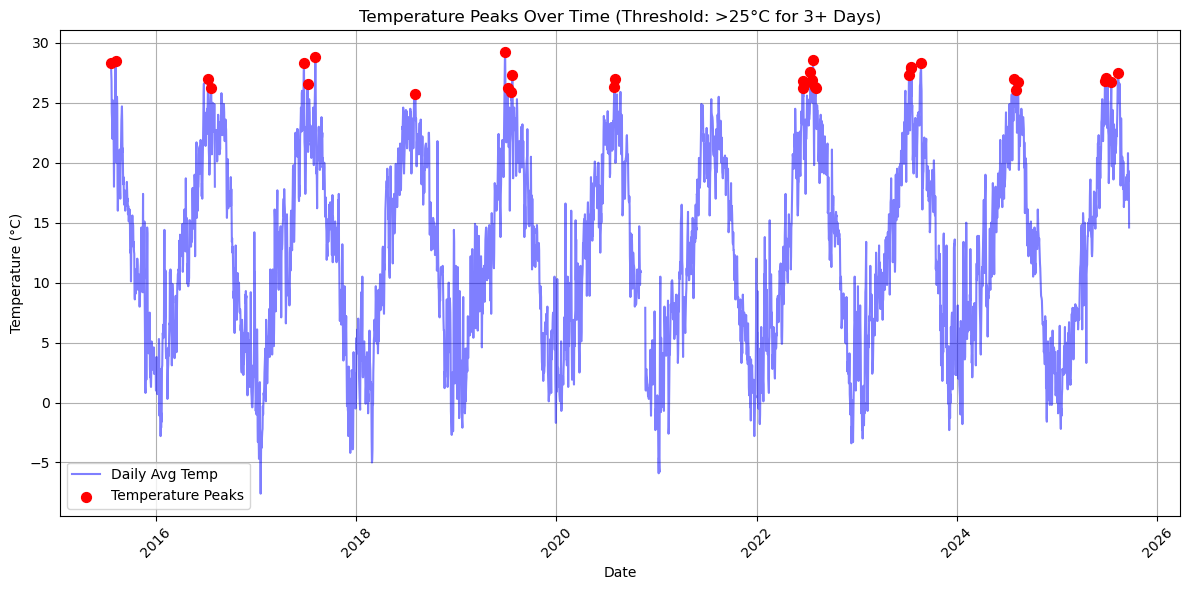

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

# Read the result CSV file
df = pd.read_csv('result.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define heatwave parameters
TEMP_THRESHOLD = 25.0  # Temperature threshold for a heatwave (°C)
MIN_DAYS = 3  # Minimum consecutive days for a heatwave

# Identify heatwave periods
df['is_hot'] = df['average_temperature'] > TEMP_THRESHOLD
df['heatwave_group'] = (df['is_hot'] != df['is_hot'].shift()).cumsum()
df['is_heatwave'] = False

# Check for heatwaves (at least MIN_DAYS consecutive hot days)
heatwave_groups = df[df['is_hot']].groupby('heatwave_group')
for group, data in heatwave_groups:
    if len(data) >= MIN_DAYS:
        df.loc[data.index, 'is_heatwave'] = True

# Detect temperature peaks
# Use scipy.signal.find_peaks to find local maxima
peaks, _ = find_peaks(df['average_temperature'], distance=1)  # Adjust distance if needed
df['is_peak'] = False
df.loc[peaks, 'is_peak'] = True

# Optionally filter peaks to only those during heatwaves
# Comment out the next line if you want all peaks, not just heatwave peaks
df['is_peak'] = df['is_peak'] & df['is_heatwave']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot all temperatures as a line
plt.plot(df['date'], df['average_temperature'], label='Daily Avg Temp', color='blue', alpha=0.5)

# Highlight peak temperatures
peak_dates = df[df['is_peak']]['date']
peak_temps = df[df['is_peak']]['average_temperature']
plt.scatter(peak_dates, peak_temps, color='red', label='Temperature Peaks', zorder=5, s=50)

# Customize the plot
plt.title('Temperature Peaks Over Time (Threshold: >25°C for 3+ Days)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

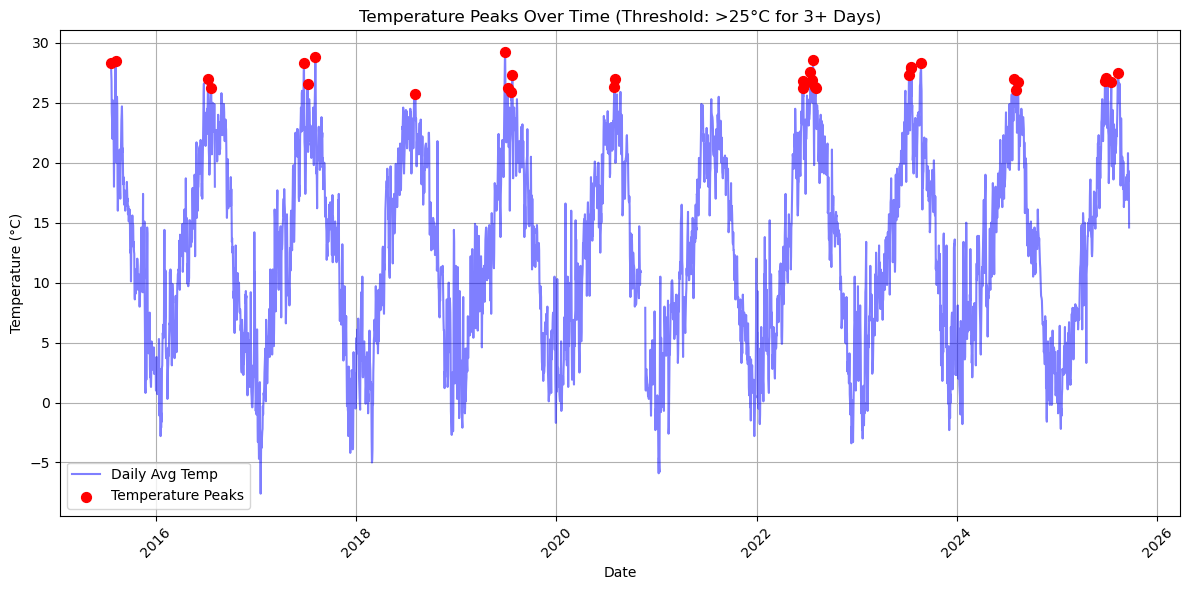

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

# Read the result CSV file
df = pd.read_csv('result.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define heatwave parameters
TEMP_THRESHOLD = 25.0  # Temperature threshold for a heatwave (°C)
MIN_DAYS = 3  # Minimum consecutive days for a heatwave

# Identify heatwave periods
df['is_hot'] = df['average_temperature'] > TEMP_THRESHOLD
df['heatwave_group'] = (df['is_hot'] != df['is_hot'].shift()).cumsum()
df['is_heatwave'] = False

# Check for heatwaves (at least MIN_DAYS consecutive hot days)
heatwave_groups = df[df['is_hot']].groupby('heatwave_group')
for group, data in heatwave_groups:
    if len(data) >= MIN_DAYS:
        df.loc[data.index, 'is_heatwave'] = True

# Detect temperature peaks
# Use scipy.signal.find_peaks to find local maxima
peaks, _ = find_peaks(df['average_temperature'], distance=1)  # Adjust distance if needed
df['is_peak'] = False
df.loc[peaks, 'is_peak'] = True

# Optionally filter peaks to only those during heatwaves
# Comment out the next line if you want all peaks, not just heatwave peaks
df['is_peak'] = df['is_peak'] & df['is_heatwave']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot all temperatures as a line
plt.plot(df['date'], df['average_temperature'], label='Daily Avg Temp', color='blue', alpha=0.5)

# Highlight peak temperatures
peak_dates = df[df['is_peak']]['date']
peak_temps = df[df['is_peak']]['average_temperature']
plt.scatter(peak_dates, peak_temps, color='red', label='Temperature Peaks', zorder=5, s=50)

# Customize the plot
plt.title('Temperature Peaks Over Time (Threshold: >25°C for 3+ Days)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

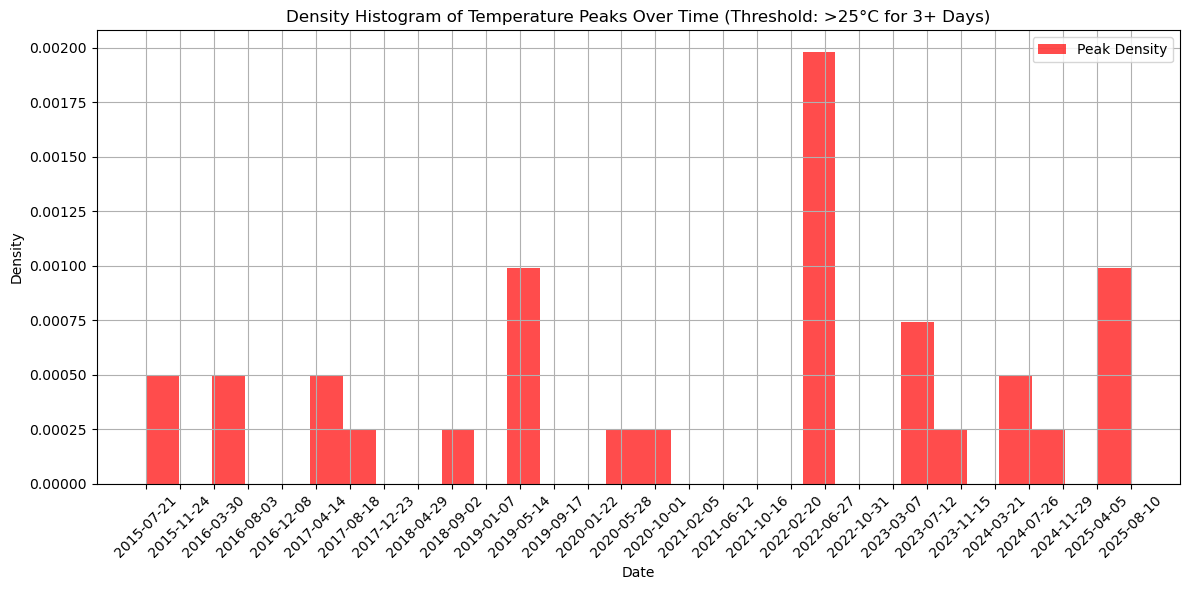

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

# Read the result CSV file
df = pd.read_csv('result.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define heatwave parameters
TEMP_THRESHOLD = 25.0  # Temperature threshold for a heatwave (°C)
MIN_DAYS = 3  # Minimum consecutive days for a heatwave

# Identify heatwave periods
df['is_hot'] = df['average_temperature'] > TEMP_THRESHOLD
df['heatwave_group'] = (df['is_hot'] != df['is_hot'].shift()).cumsum()
df['is_heatwave'] = False

# Check for heatwaves (at least MIN_DAYS consecutive hot days)
heatwave_groups = df[df['is_hot']].groupby('heatwave_group')
for group, data in heatwave_groups:
    if len(data) >= MIN_DAYS:
        df.loc[data.index, 'is_heatwave'] = True

# Detect temperature peaks
peaks, _ = find_peaks(df['average_temperature'], distance=1)  # Adjust distance if needed
df['is_peak'] = False
df.loc[peaks, 'is_peak'] = True

# Optionally filter peaks to only those during heatwaves
df['is_peak'] = df['is_peak'] & df['is_heatwave']

# Prepare data for density histogram
peak_dates = df[df['is_peak']]['date']

# Convert dates to numerical format for histogram (e.g., days since start)
time_numeric = (peak_dates - peak_dates.min()).dt.days

# Create the density histogram
plt.figure(figsize=(12, 6))
plt.hist(time_numeric, bins=30, density=True, color='red', alpha=0.7, label='Peak Density')

# Convert x-axis back to dates for labeling
date_min = peak_dates.min()
date_max = peak_dates.max()
num_bins = 30
date_range = pd.date_range(start=date_min, end=date_max, periods=num_bins)

# Set x-axis ticks
plt.xticks(np.linspace(0, (date_max - date_min).days, num_bins), 
           [d.strftime('%Y-%m-%d') for d in date_range], rotation=45)

# Customize the plot
plt.title('Density Histogram of Temperature Peaks Over Time (Threshold: >25°C for 3+ Days)')
plt.xlabel('Date')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

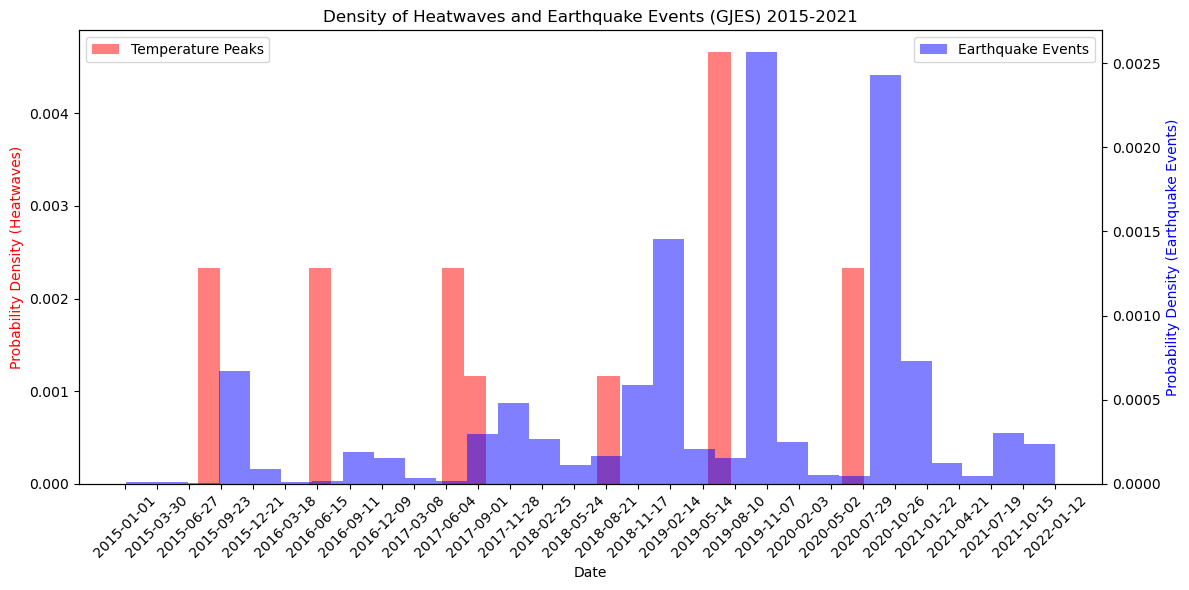

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

# --- Temperature Data Processing ---
# Read the temperature CSV file
temp_df = pd.read_csv('result.csv')

# Convert date column to datetime
temp_df['date'] = pd.to_datetime(temp_df['date'])

# Filter for 2015 onward and less than 2021-12-31 
temp_df = temp_df[(temp_df['date'] >= '2015-01-01') & (temp_df['date'] <= '2021-12-31')]
# Define heatwave parameters
TEMP_THRESHOLD = 25.0  # Temperature threshold for a heatwave (°C)
MIN_DAYS = 3  # Minimum consecutive days for a heatwave

# Identify heatwave periods
temp_df['is_hot'] = temp_df['average_temperature'] > TEMP_THRESHOLD
temp_df['heatwave_group'] = (temp_df['is_hot'] != temp_df['is_hot'].shift()).cumsum()
temp_df['is_heatwave'] = False

# Check for heatwaves (at least MIN_DAYS consecutive hot days)
heatwave_groups = temp_df[temp_df['is_hot']].groupby('heatwave_group')
for group, data in heatwave_groups:
    if len(data) >= MIN_DAYS:
        temp_df.loc[data.index, 'is_heatwave'] = True

# Detect temperature peaks
peaks, _ = find_peaks(temp_df['average_temperature'], distance=1)
temp_df['is_peak'] = False
temp_df.loc[peaks, 'is_peak'] = True

# Filter peaks to only those during heatwaves
temp_df['is_peak'] = temp_df['is_peak'] & temp_df['is_heatwave']

# Get peak dates
peak_dates = temp_df[temp_df['is_peak']]['date']

# --- Earthquake Data Processing ---
# Load earthquake data from text file
data = []
with open('data.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        if '│' in line and 'eventID' not in line:  # Skip header and empty lines
            parts = [part.strip() for part in line.split('│')[1:-1]]
            data.append(parts)

# Create earthquake DataFrame
columns = ['eventID', 'DateTime', 'MLx', 'Mw', 'TpN', 'CCC', 'Type', 'Lon', 'Lat', 'Depth', 'ErrorX', 'ErrorY', 'ErrorZ']
eq_df = pd.DataFrame(data, columns=columns)

# Convert DateTime to datetime
eq_df['DateTime'] = pd.to_datetime(eq_df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# Convert Mw to numeric, handling missing values
eq_df['Mw'] = pd.to_numeric(eq_df['Mw'], errors='coerce')

# Filter out rows with missing Mw and dates before 2015
eq_df_filtered = eq_df.dropna(subset=['Mw'])
eq_df_filtered = eq_df_filtered[eq_df_filtered['DateTime'] >= '2015-01-01']

# --- Create Combined Plot ---
plt.figure(figsize=(12, 6))

# Create primary axis for temperature peaks
ax1 = plt.gca()
# Convert temperature peak dates to numerical (days since 2015-01-01) for histogram
temp_time_numeric = (peak_dates - pd.Timestamp('2015-01-01')).dt.days
ax1.hist(temp_time_numeric, bins=30, density=True, color='red', alpha=0.5, label='Temperature Peaks')

# Create secondary axis for earthquake events
ax2 = ax1.twinx()
# Convert earthquake dates to numerical (days since 2015-01-01) for histogram
eq_time_numeric = (eq_df_filtered['DateTime'] - pd.Timestamp('2015-01-01')).dt.days
ax2.hist(eq_time_numeric, bins=30, density=True, color='blue', alpha=0.5, label='Earthquake Events')

# Set x-axis with dates
date_min = pd.Timestamp('2015-01-01')
date_max = max(peak_dates.max(), eq_df_filtered['DateTime'].max())
num_bins = 30
date_range = pd.date_range(start=date_min, end=date_max, periods=num_bins)
ax1.set_xticks(np.linspace(0, (date_max - date_min).days, num_bins))
ax1.set_xticklabels([d.strftime('%Y-%m-%d') for d in date_range], rotation=45)

# Customize plot
ax1.set_xlabel('Date')
ax1.set_ylabel('Probability Density (Heatwaves)', color='red')
ax2.set_ylabel('Probability Density (Earthquake Events)', color='blue')
plt.title('Density of Heatwaves and Earthquake Events (GJES) 2015-2021')
#ax1.grid(True, alpha=0.3)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Observed Correlation: 0.035
P-value (permutation test): 0.045


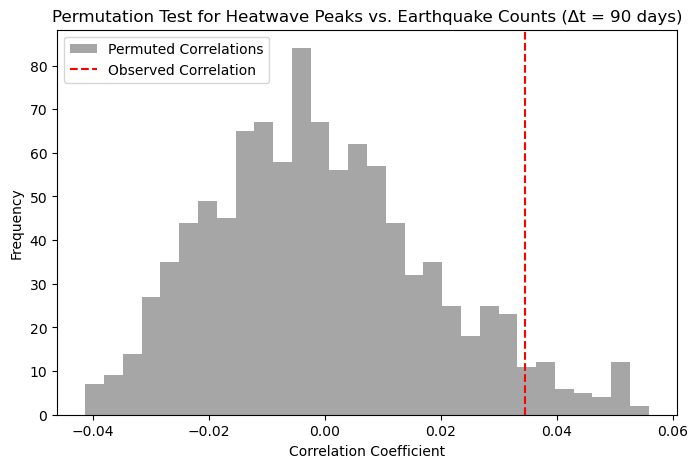

Significant correlation: Heatwave peaks may precede increased earthquake activity.


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# --- Data Preparation (from your code) ---
# Assume peak_dates and eq_df_filtered['DateTime'] are available
# Create daily bins (2015-2021)
date_min = pd.Timestamp('2015-01-01')
date_max = pd.Timestamp('2021-12-31')
bins = pd.date_range(date_min, date_max, freq='D')

# Binary heatwave peak series (1 if peak, 0 otherwise)
heatwave_series = pd.Series(0, index=bins)
heatwave_series.loc[peak_dates] = 1

# Count earthquakes per day
eq_counts = eq_df_filtered['DateTime'].dt.floor('D').value_counts().reindex(bins, fill_value=0)

# --- Lagged Correlation Analysis ---
delta_t = 90  # Time window (90 days)
eq_counts_shifted = np.zeros(len(bins))
for i in range(len(bins) - delta_t):
    eq_counts_shifted[i] = eq_counts[i:i + delta_t].sum()

# Compute observed correlation
# Use heatwave series and earthquake counts within 7 days
observed_corr, _ = pearsonr(heatwave_series.values[:-delta_t], eq_counts_shifted[:-delta_t])

# --- Permutation Test ---
n_permutations = 1000
perm_corrs = np.zeros(n_permutations)
for i in range(n_permutations):
    # Randomly shuffle heatwave peak times
    shuffled_indices = np.random.permutation(len(heatwave_series))
    shuffled_heatwave = heatwave_series.values[shuffled_indices][:-delta_t]
    # Compute correlation with shuffled data
    perm_corrs[i], _ = pearsonr(shuffled_heatwave, eq_counts_shifted[:-delta_t])

# Calculate p-value (proportion of permuted correlations >= observed)
p_value = np.mean(perm_corrs >= observed_corr)

# --- Results ---
print(f"Observed Correlation: {observed_corr:.3f}")
print(f"P-value (permutation test): {p_value:.3f}")

# Plot permutation distribution
plt.figure(figsize=(8, 5))
plt.hist(perm_corrs, bins=30, color='gray', alpha=0.7, label='Permuted Correlations')
plt.axvline(observed_corr, color='red', linestyle='--', label='Observed Correlation')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title(f'Permutation Test for Heatwave Peaks vs. Earthquake Counts (Δt = {delta_t} days)')
plt.legend()
plt.show()

# --- Interpretation ---
if p_value < 0.05:
    print("Significant correlation: Heatwave peaks may precede increased earthquake activity.")
else:
    print("No significant correlation: Heatwave peaks do not strongly precede earthquakes.")

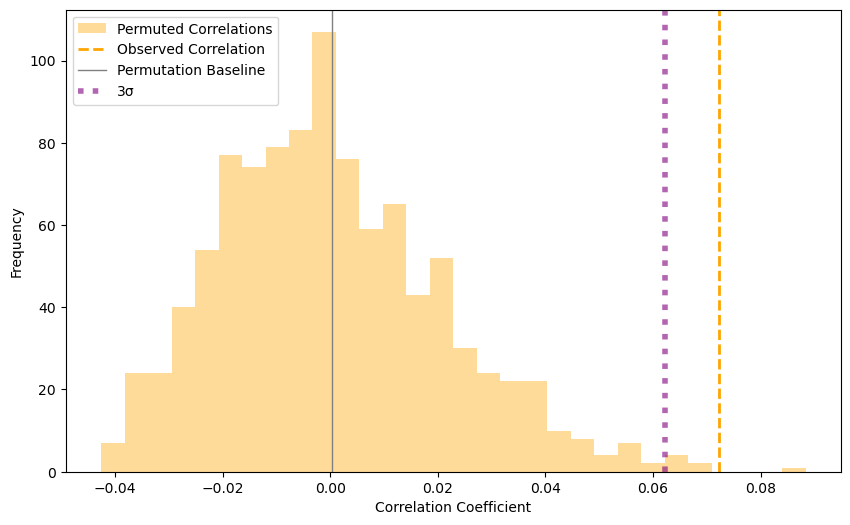

Observed Correlation
P-value (permutation test): 0.001
Mean of Permuted Correlations: 0.000
Standard Deviation of Permuted Correlations: 0.021
Number of Sigmas from Mean: 3.5
Significant correlation: Heatwave peaks may precede increased earthquake activity.


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# --- Data Preparation (unchanged) ---
# Assume peak_dates and eq_df_filtered['DateTime'] are available
# Create daily bins (2015-2021)
date_min = pd.Timestamp('2015-01-01')
date_max = pd.Timestamp('2021-12-31')
bins = pd.date_range(date_min, date_max, freq='D')

# Binary heatwave peak series (1 if peak, 0 otherwise)
heatwave_series = pd.Series(0, index=bins)
heatwave_series.loc[peak_dates] = 1

# Count earthquakes per day
eq_counts = eq_df_filtered['DateTime'].dt.floor('D').value_counts().reindex(bins, fill_value=0)

# --- Lagged Correlation Analysis ---
delta_t = 120  # Time window (90 days)
eq_counts_shifted = np.zeros(len(bins))
for i in range(len(bins) - delta_t):
    eq_counts_shifted[i] = eq_counts[i:i + delta_t].sum()

# Compute observed correlation
observed_corr, _ = pearsonr(heatwave_series.values[:-delta_t], eq_counts_shifted[:-delta_t])

# --- Permutation Test ---
n_permutations = 1000
perm_corrs = np.zeros(n_permutations)
for i in range(n_permutations):
    # Randomly shuffle heatwave peak times
    shuffled_indices = np.random.permutation(len(heatwave_series))
    shuffled_heatwave = heatwave_series.values[shuffled_indices][:-delta_t]
    # Compute correlation with shuffled data
    perm_corrs[i], _ = pearsonr(shuffled_heatwave, eq_counts_shifted[:-delta_t])

# Calculate p-value
p_value = np.mean(perm_corrs >= observed_corr)

# --- Calculate Sigmas ---
mean_perm_corrs = np.mean(perm_corrs)
std_perm_corrs = np.std(perm_corrs)
z_score = (observed_corr - mean_perm_corrs) / std_perm_corrs
sigmas = abs(z_score)  # Number of standard deviations from the mean

# --- Plot Permutation Distribution with Sigma Lines ---
plt.figure(figsize=(10, 6))
plt.hist(perm_corrs, bins=30, color='Orange', alpha=0.4, label='Permuted Correlations')
plt.axvline(observed_corr, color='orange', linestyle='--', label=f'Observed Correlation',linewidth=2)
plt.axvline(mean_perm_corrs, color='grey', linestyle='-', label=f'Permutation Baseline',linewidth=1)

# Add sigma lines (±1σ, ±2σ, ±3σ)
sigma_lines = [3]
colors = ['purple', 'orange', 'purple']
linestyles = [':', '-.', '--']
for sigma, color, ls in zip(sigma_lines, colors, linestyles):
    plt.axvline(mean_perm_corrs + sigma * std_perm_corrs, color=color, linestyle=ls, alpha=0.6, label=f'{sigma}σ',linewidth=4)

plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
#plt.title(f'Permutation Test for Heatwave Peaks vs. Earthquake Counts (Δt = {delta_t} days)\nSigmas from Mean: {sigmas:.2f}')
plt.legend()
#plt.grid(True, alpha=0.3)
plt.show()

# --- Results ---
print(f"Observed Correlation")
print(f"P-value (permutation test): {p_value:.3f}")
print(f"Mean of Permuted Correlations: {mean_perm_corrs:.3f}")
print(f"Standard Deviation of Permuted Correlations: {std_perm_corrs:.3f}")
print(f"Number of Sigmas from Mean: {sigmas:.1f}")

# --- Interpretation ---
if p_value < 0.05:
    print("Significant correlation: Heatwave peaks may precede increased earthquake activity.")
else:
    print("No significant correlation: Heatwave peaks do not strongly precede earthquakes.")